# Varying diameter

In this notebook we will try to create a scaling law to account for a varying propeller diameter as well as a varying number of blade and a varying altitude. Twist law should also vary but for now it will be left as is.

In [1]:
import warnings

warnings.filterwarnings(action="ignore")

We'll adjust slightly the defined set here to take something similar to the previous notebook, that is $\pi_2 = \frac{picth}{PITCH_{REF}}$ and $\pi_3 = n_{blade}$

In [2]:
import pandas as pd
import numpy as np

results_fixed_pitch = pd.read_csv('data/doe_fixed_pitch.csv')
results_ICE = pd.read_csv('data/doe_ICE.csv')
results_TP = pd.read_csv('data/doe_TP.csv') 

results = pd.concat([results_fixed_pitch, results_ICE, results_TP])

number_of_element = len(results['Thrust'].to_numpy())

print("Number of element pre screening: ", number_of_element)

thrust_array = results['Thrust'].to_numpy()[0::10]
power_array = results['Power'].to_numpy()[0::10] 
eta_array = results['Efficiency'].to_numpy()[0::10]
sigma_array = results['Solidity'].to_numpy()[0::10]
AF_array = results['Activity Factor'].to_numpy()[0::10] 
lambda_array = results['Aspect ratio'].to_numpy()[0::10]
n_rot_val = results['Rotational speed'].to_numpy()[0::10]
D_val  = results['Diameter'].to_numpy()[0::10]
n_blade_val = results['Number of blades'].to_numpy()[0::10]
RHO_val = results['Density'].to_numpy()[0::10]
pitch_val = results[ 'Pitch at 0.75R'].to_numpy()[0::10]
PITCH_REF_val = results['Ref Pitch at 0.75R'].to_numpy()[0::10]
v_val = results['Flight speed'].to_numpy()[0::10]
altitude = results['Altitude'].to_numpy()[0::10]

print(np.min(n_rot_val), np.max(n_rot_val))
print(np.min(D_val), np.max(D_val))
print(np.min(RHO_val), np.max(RHO_val))
print(np.min(v_val), np.max(v_val))
print(np.min(n_blade_val), np.max(n_blade_val))

print("Number of element post screening: ", len(n_rot_val))

ct_array = thrust_array / (RHO_val * n_rot_val ** 2 * D_val ** 4)
cp_array = power_array / (RHO_val * n_rot_val ** 3 * D_val ** 5)

Number of element pre screening:  7964
10.477966873996948 103.85402645656714
0.4801683148599402 3.253347260308085
0.4413260041804466 1.286044732406289
4.865980691188072 186.39649616681643
2.0 6.0
Number of element post screening:  797


# Trying $\eta$ as a function of Ct and J


Elected model for regression is n°20:


<IPython.core.display.Latex object>

<Figure size 432x288 with 0 Axes>

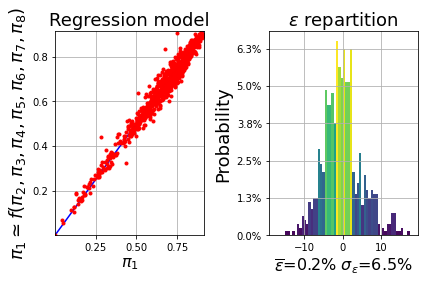

In [3]:
# Import pyVPLM modules/functions
from pyvplm.addon.variablepowerlaw import regression_models, perform_regression

import pandas as pd

from stdatm import Atmosphere

atm = Atmosphere(altitude, altitude_in_feet=False)

pi1 = eta_array
pi2 = ct_array
pi3 = v_val / (n_rot_val * D_val)
pi4 = (v_val ** 2.0 + (n_rot_val * 2.0 * np.pi) ** 2.0 * (D_val / 2.0) ** 2.0) / atm.speed_of_sound ** 2.0
pi5 = v_val * D_val / atm.kinematic_viscosity
pi6 = sigma_array
pi7 = AF_array
pi8 = lambda_array
doe_eta = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8]
doe_eta = pd.DataFrame(doe_eta, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7", "pi8"])

# Fit with 3rd order power-law model the obtained Pi DOE
model = regression_models(
    doe_eta.values, elected_pi0="pi1", order=2, log_space=True, ymax_axis=10, test_mode=True
)
perform_regression(doe_eta.values, model, choosen_model=20)

# Trying Ct as a function of J, twist and other parameters

In [ ]:
atm = Atmosphere(altitude, altitude_in_feet=False)

pi1 = ct_array
pi2 = v_val / (n_rot_val * D_val)
pi3 = (
    v_val ** 2.0 + (n_rot_val * 2.0 * np.pi) ** 2.0 * (D_val / 2.0) ** 2.0
) / atm.speed_of_sound ** 2.0
pi4 = v_val * D_val / atm.kinematic_viscosity
pi5 = sigma_array
pi6 = pitch_val / PITCH_REF_val
pi7 = AF_array
pi8 = lambda_array
doe_ct = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8]
doe_ct = pd.DataFrame(doe_ct, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7", "pi8"])

# Fit with 3rd order power-law model the obtained Pi DOE
model = regression_models(
    doe_ct.values, elected_pi0="pi1", order=3, log_space=True, ymax_axis=10, test_mode=True
)
perform_regression(doe_ct.values, model, choosen_model=40)

In [ ]:
print(np.round(ct_array[:5],3))

In [ ]:
print(np.min(pi2), np.max(pi2))
print(np.min(pi3), np.max(pi3))
print(np.min(pi4/1e6), np.max(pi4/1e6))
print(np.min(pi5), np.max(pi5))
print(np.min(pitch_val / PITCH_REF_val), np.max(pitch_val / PITCH_REF_val))
print(np.min(pi7), np.max(pi7))
print(np.min(pi8), np.max(pi8))

# Trying Ct as a function of J, Cp and other parameters

In [7]:
atm = Atmosphere(altitude, altitude_in_feet=False)

pi1 = ct_array
pi2 = v_val / (n_rot_val * D_val)
pi3 = (v_val ** 2.0 + (n_rot_val * 2.0 * np.pi) ** 2.0 * (D_val / 2.0) ** 2.0) / atm.speed_of_sound ** 2.0
pi4 = v_val * D_val / atm.kinematic_viscosity
pi5 = sigma_array
pi6 = cp_array
pi7 = AF_array
pi8 = lambda_array
doe_ct = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8]
doe_ct = pd.DataFrame(doe_ct, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7", "pi8"])

# Fit with 3rd order power-law model the obtained Pi DOE
model = regression_models(
    doe_ct.values, elected_pi0="pi1", order=4, log_space=True, ymax_axis=10, test_mode=True
)
perform_regression(doe_ct.values, model, choosen_model=50)

KeyboardInterrupt: 

In [ ]:
idx = np.where(altitude==0.0)[0]
print(np.unique(D_val))

# Trying Cp as a function of J, Ct and other parameters


Elected model for regression is n°40:


<IPython.core.display.Latex object>

<Figure size 432x288 with 0 Axes>

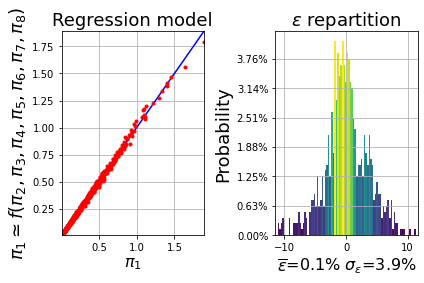

In [4]:
atm = Atmosphere(altitude, altitude_in_feet=False)

pi1 = cp_array
pi2 = v_val / (n_rot_val * D_val)
pi3 = (v_val ** 2.0 + (n_rot_val * 2.0 * np.pi) ** 2.0 * (D_val / 2.0) ** 2.0) / atm.speed_of_sound ** 2.0
pi4 = v_val * D_val / atm.kinematic_viscosity  # Somehow reduced the deviation :O
pi5 = sigma_array
pi6 = ct_array
pi7 = AF_array
pi8 = lambda_array
doe_cp = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7, pi8]
doe_cp = pd.DataFrame(doe_cp, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7", "pi8"])

# Fit with 3rd order power-law model the obtained Pi DOE
model = regression_models(
    doe_cp.values, elected_pi0="pi1", order=3, log_space=True, ymax_axis=10, test_mode=True
)
perform_regression(doe_cp.values, model, choosen_model=40)

In [5]:
print(np.min(pi2), np.max(pi2))
print(np.min(pi3), np.max(pi3))
print(np.min(pi4/1e6), np.max(pi4/1e6))
print(np.min(pi5), np.max(pi5))
print(np.min(pi6), np.max(pi6))
print(np.min(pi7), np.max(pi7))
print(np.min(pi8), np.max(pi8))

0.06633910643287382 3.1657157289617888
0.06538711605974705 1.051657788396106
0.1778044304346985 33.36174949618214
0.0432026164563657 0.4380272848789879
1.0780798388902704e-05 0.7548688969935875
63.70950554580333 238.67893858162705
3.230777219427432 12.122293820449654
